# Physics 404/604

## Computational Physics (Spring 2020)

## BPB-250

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |









# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm




## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 1, 1, 2, 3, 5, 8, 13, 21, 34, …
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?


**Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.**

## 1.3.1 Recursion method:

Recursion in computer science is a method of solving a problem where the solution depends on solutions to smaller instances of the same problem.

Most computer programming languages support recursion by allowing a function to call itself from within its own code. 

In [1]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [2]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 101.54096937179565 seconds ---


## 1.3.2 Memoization method (Top down):

an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

turning [the results of] a function into something to be remembered

In [5]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table) # try this:  please finish this line using recursive method
        
    return table[n]

In [11]:
import time
n=1400
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# try this: Please calculate time if n=40, 1400, 14000


# In programming, the call stack is a buffer that stores requests that need to be handled.

17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.002173185348510742 seconds ---


## 1.3.2  Tabulation Method (bottom-up)
Calculate all the values from small to big

In [16]:
# calculate numbers one by one from table[2] to table[n]

def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
   
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    for i in range(2, n+1):
        table[i] = table[i-1] + table[i-2]
        
    return table[n]

In [17]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(1400))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0004394054412841797 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0008652210235595703 seconds ---
30024687611784610909954941797150256486927479374907929434683754295022302429422848358634023335752162178658116387303893522391813423077567204146193912177985425759965410810605019053021570190026149647173108088094786756027114403612415007326991458343778563263940370716662743216573053208040553070210197932517628308167015873869948880323622321982198435498652758806996123592751252434571324967728548865087033966433650424543330098020063842868595816492963908030032326548984645615892344451398632426062857115917462228808073910572119126558184997987209873025407120679598408021068497765475222474299046183573947717256532535593461952826012850

## 1.3.3 Using Matrix Algebra (Optional)

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

To calculate F(100), need $A^{100}$ -> $(A^{50})^2$->$A^{25}$->$A^{12}$->$A^6$->$A^3$->$A^1$

In [21]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [22]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0004038810729980469 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285019169360207355179223814857106405285007997547692546378757062999581657867188420995770650565521377874333085963123444258953052751461206977615079511435862879678439081175536265576977106865074099512897235100538241196445815568291377846656352979228098911566675956525644182645608178603837172227838896725425605719942300037650526231486881066037

# 2. the complexity of the algorithms

Algorithm complexity is a measure which evaluates the order of the count of operations, performed by a given or algorithm as a function of the size of the input data. To put this simpler, complexity is a rough approximation of the number of steps necessary to execute an algorithm. When we evaluate complexity we speak of order of operation count, not of their exact count. 

For example if we have an order of $N^2$ operations to process N elements, then $N^2$/2 and 3*$N^2$ are of one and the same quadratic order.

Algorithm complexity is commonly represented with the O(f) notation e.g. O($N^2$)

In [24]:


n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


1 3.814697265625e-05
4 3.695487976074219e-05
7 6.771087646484375e-05
10 0.00025916099548339844
13 0.0011632442474365234
16 0.00435328483581543
19 0.021711111068725586
22 0.1356945037841797
25 0.37804341316223145
28 1.6340827941894531
31 6.93691611289978
34 28.09573483467102
37 119.60300350189209


KeyboardInterrupt: 

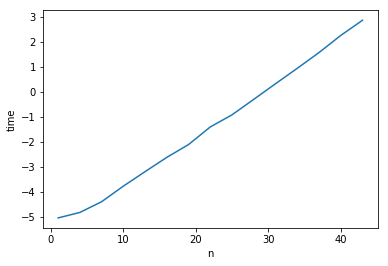

In [87]:
import matplotlib.pyplot as plt
import math
plt.plot(n2,np.log10(time2))
plt.xlabel('n')
plt.ylabel('log10(time)')
plt.show()

In [46]:
# try this: following the above example to calculate the time if n=n2[0], n2[1]...., and make a plot for log10(time) vs n

n=np.arange(100,100000,100)
time3=np.zeros(n.size)
for i in range(n.size):
    start_time = time.time()
    temp=fib4(n[i])
    time3[i] = time.time()-start_time
    print(n[i],time3[i])

999
100 4.1961669921875e-05
200 5.602836608886719e-05
300 8.535385131835938e-05
400 0.00011110305786132812
500 0.0001480579376220703
600 0.00029587745666503906
700 0.00021004676818847656
800 0.00047898292541503906
900 0.00043511390686035156
1000 0.0003299713134765625
1100 0.0003719329833984375
1200 0.0005588531494140625
1300 0.0004100799560546875
1400 0.0003337860107421875
1500 0.0004489421844482422
1600 0.00034499168395996094
1700 0.0003821849822998047
1800 0.0003981590270996094
1900 0.0004069805145263672
2000 0.00042176246643066406
2100 0.0006809234619140625
2200 0.0005450248718261719
2300 0.0005068778991699219
2400 0.0006206035614013672
2500 0.0005512237548828125
2600 0.0005290508270263672
2700 0.0006549358367919922
2800 0.0005879402160644531
2900 0.0006048679351806641
3000 0.0007197856903076172
3100 0.0007448196411132812
3200 0.0007150173187255859
3300 0.0008301734924316406
3400 0.0007429122924804688
3500 0.0007579326629638672
3600 0.0008590221405029297
3700 0.0008170604705810547
3

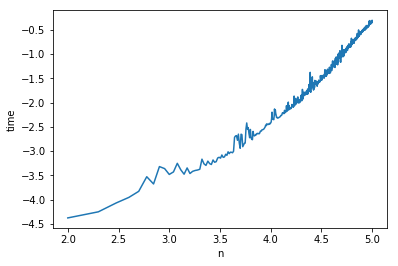

In [54]:
# matrix method
n2=np.arange(1000,1000000,1000)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib5(n2[i])
    time2[i] = time.time()-start_time


999


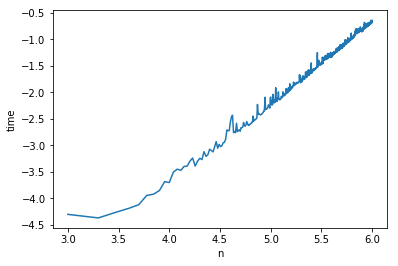

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('n')
plt.ylabel('time')
plt.show()